# k-means clustering

In [1]:
#k stands for "n" numbers or number of cluster
#1. find with k centroid by putiing them at random place
#2. compute distnace of every point from centroid and cluster them accordingly
#3. adjust centroid so that they become center of gravity
#4 again recenter every point based on their distance with centroid
#recompute cluster and repaeat until data point stop changing cluster

In [2]:
import pandas as pd
df=pd.read_csv("./CSV/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income')

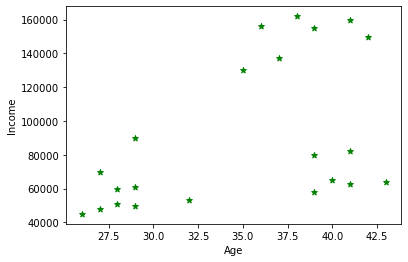

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df['Income($)'],color="green",marker="*")
plt.xlabel("Age")
plt.ylabel("Income")

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
km=KMeans(n_clusters=3)


In [6]:
y_predict=km.fit_predict(df[['Age','Income($)']])

In [7]:
yseries=pd.Series(y_predict,name='cluster')

In [9]:
df1=pd.concat([df,yseries],axis=1)
df1.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [10]:
km.cluster_centers_ #centroid

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [12]:
km.inertia_ 

1577046058.883117

In [15]:
import warnings 
warnings.filterwarnings("ignore")
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 814746044.2545456,
 296500418.0952381,
 231967084.46190482,
 173633694.45000002,
 120800257.03333335,
 93500268.41666666]

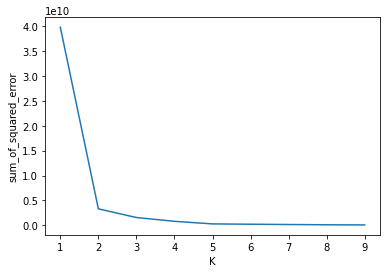

In [17]:
import numpy as np
plt.xlabel('K')
plt.ylabel('sum_of_squared_error')
plt.plot(np.arange(1,10),sse)